In [1]:
# enable autoreload
%load_ext autoreload
%autoreload 2

from TorchMetricLogger import TorchMetricLogger as TML
from TorchMetricLogger import TmlF1, TmlHistogram
import torch

(array([12, 27, 22, 16, 24, 15, 14, 28, 18, 24]),
 array([0.00547985, 0.10447088, 0.2034619 , 0.30245293, 0.40144396,
        0.50043499, 0.59942602, 0.69841704, 0.79740807, 0.8963991 ,
        0.99539013]))

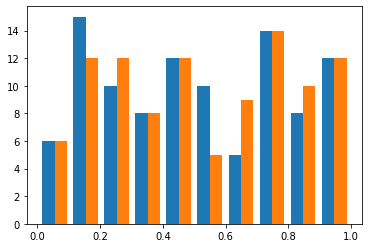

In [2]:
import numpy as np
import matplotlib.pyplot as plt

arr = np.random.rand(100, 2)

plt.hist(arr)
np.histogram(arr)

In [3]:
import wandb

wandb.init(project="test_torchmetriclogger", entity="inexen")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: p-sodmann (inexen). Use `wandb login --relogin` to force relogin


In [17]:
tml = TML(log_function=wandb.log)

p_1d = torch.ones((100, 2))
y_1d = torch.ones((100, 2))

p_1d[:, 0] = torch.randn(100)
y_1d[0:50, 0] = 0
y_1d[0, 1] = 0

def histogram_log_function(result_dict):
    np_hist_scores = {key: np.histogram(result_dict[key], range=(0., 1.), bins=25) for key in result_dict.keys()}

    return {
        key: wandb.Histogram(np_histogram=np_hist_scores[key]) for key in result_dict.keys()
    }

tml(
    miau=TmlHistogram(p_1d, y_1d, class_names=["0", "1"], log_function=histogram_log_function),
)

result = tml.on_batch_end()

reduce histogram


In [7]:
key

'miau_1_neg'

In [11]:
np_hist_scores

(array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

In [8]:
tml.metrics["miau"]

TmlHistogram(predictions=array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32), gold_labels=array([[0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32), values=None, metric_class=None, class_names=['0', '1'], weights=None, is_metric=False)

In [9]:
tml = TML()

p_1d = torch.ones((10, 1))
y_1d = torch.ones((10, 1))

tml(
    miau=TMLF1(p_1d, y_1d, class_names=["0"]),
)

tml(
    miau=TMLF1(p_1d, y_1d, class_names=["0"]),
)

tml(
    miau=TMLF1(p_1d, y_1d, class_names=["0"]),
)

result = tml.on_batch_end()

assert(result["miau"]["micro"] == 1.0)
assert (result["miau"]["precision"] == 1.0)
assert (result["miau"]["recall"] == 1.0)
assert (result["miau"]["tp"] == 30)
assert (result["miau"]["fp"] == 0)
assert (result["miau"]["fn"] == 0)

NameError: name 'TMLF1' is not defined

In [ ]:
tml = TML()

p_1d = torch.ones((10, 1))
y_1d = torch.ones((10, 1))
y_1d[5:] = 0

tml(
    miau=TMLF1(p_1d, y_1d, class_names=["0"]),
)

tml(
    miau=TMLF1(p_1d, y_1d, class_names=["0"]),
)

tml(
    miau=TMLF1(p_1d, y_1d, class_names=["0"]),
)

result = tml.on_batch_end()

# assert (result["miau"]["micro"] == 0.5)
assert (result["miau"]["precision"] == 0.5)
assert (result["miau"]["recall"] == 1.0)
assert (result["miau"]["tp"] == 15)
assert (result["miau"]["fp"] == 15)
assert (result["miau"]["fn"] == 0)

AssertionError: 

In [ ]:
result

{'miau': {'macro': 0.6666666666666666,
  'precision': 0.5,
  'recall': 1.0,
  'micro': 0.6666666666666666,
  'soft_micro': 0.6666666666666666,
  'tp': 15,
  'fp': 15,
  'fn': 0},
 'miau_0': {'macro': 0.6666666666666666,
  'precision': 0.5,
  'recall': 1.0,
  'micro': 0.6666666666666666,
  'soft_micro': 0.6666666666666666,
  'tp': 15,
  'fp': 15,
  'fn': 0}}

In [ ]:
tml.metrics["miau"].history

defaultdict(list, {'mean': [0.9462365591397646]})

In [ ]:
tml = TML()
p_2d = torch.ones((10, 5))
y_2d = torch.ones((10, 5))

p_2d[0] = 0

p_2d[3, 3] = 0

w = torch.ones(10, 5)
w[3,3] = 0

tml(
    miau=TmlMetric(p_2d, y_2d, class_names=["0", "1", "2", "3", "4"], metric_class=TMLDiceCoefficient),
)

In [ ]:
tml(
    miau=TmlMetric(p_2d, y_2d, class_names=["0", "1", "2", "3", "4"], metric_class=TMLDiceCoefficient),
)

In [ ]:
import numpy as np
np.array([7]).tolist()

[7]

In [ ]:
tml.metrics.keys()

dict_keys(['miau', 'miau_0', 'miau_1', 'miau_2', 'miau_3', 'miau_4'])

In [ ]:
tml.metrics["miau_3"].partial

defaultdict(list,
            {'metric': [0.5,
              1.0,
              1.0,
              0.5,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              0.5,
              1.0,
              1.0,
              0.5,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0],
             'weights': [1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0,
              1.0]})

In [ ]:
tml.metrics["miau"].reduce()

{'mean': 0.9066666647791862, 'median': 1.0, 'min': 0.16666667, 'max': 1.0}

In [ ]:
tml.metrics["miau"].history

defaultdict(list,
            {'mean': [0.9066666647791862],
             'median': [1.0],
             'min': [0.16666667],
             'max': [1.0]})

In [ ]:
from TorchMetricLogger import TorchMetricLogger as TML
from TorchMetricLogger import TmlMetric, TmlMetricFunction, TMLBinaryAccuracy, TMLDiceCoefficient, TMLF1, TMLMean
import torch
import numpy as np

# create a list of fake losses between 2 and 1
loss = np.linspace(2.0, 0.0, num=50)

tml = TML()

# add them together as one batch
for l in loss:
    tml(loss=TmlMetric(None, l, TMLMean))

tml.on_batch_end()

# assert the average loss is 1
#assert np.allclose(tml.metrics["loss"].history, 1)

{'loss': {'mean': 1.0000000000000002, 'median': 1.0, 'min': 0.0, 'max': 2.0}}

In [ ]:
tml.metrics["loss"].partial

defaultdict(list, {})